In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from cv2 import imshow
from PIL import Image 
from sklearn.model_selection import train_test_split
import os

In [13]:
with_mask_files = os.listdir("data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [14]:
without_mask_files = os.listdir("data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [15]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [16]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


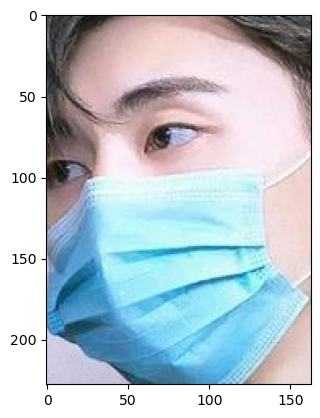

In [22]:
img = mpimg.imread('data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

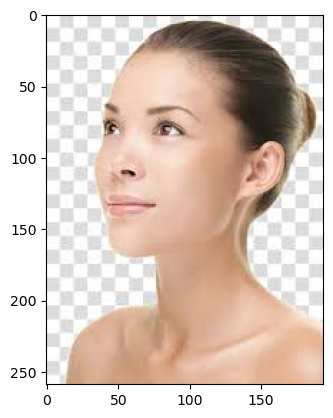

In [21]:
img = mpimg.imread('data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\sphar\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
X = np.array(data)
y = np.array(labels)

In [26]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:
X_test_scaled

array([[[[0.28235294, 0.2627451 , 0.24313725],
         [0.34509804, 0.33333333, 0.31764706],
         [0.65490196, 0.65490196, 0.65490196],
         ...,
         [0.82745098, 0.69411765, 0.50588235],
         [0.90980392, 0.78823529, 0.59607843],
         [0.99215686, 0.8745098 , 0.67843137]],

        [[0.2745098 , 0.24705882, 0.23137255],
         [0.37647059, 0.36078431, 0.34509804],
         [0.69019608, 0.68627451, 0.69019608],
         ...,
         [0.80392157, 0.67058824, 0.49019608],
         [0.89803922, 0.77254902, 0.58823529],
         [0.98823529, 0.86666667, 0.68235294]],

        [[0.29019608, 0.25490196, 0.24313725],
         [0.39607843, 0.36470588, 0.35686275],
         [0.69411765, 0.68235294, 0.68627451],
         ...,
         [0.78039216, 0.64705882, 0.47058824],
         [0.88627451, 0.76078431, 0.58431373],
         [0.98431373, 0.8627451 , 0.68235294]],

        ...,

        [[0.24313725, 0.28627451, 0.36862745],
         [0.37647059, 0.40392157, 0.48627451]

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,Flatten,Dropout,Conv2D

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_of_classes,activation='sigmoid'))

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [40]:
his = model.fit(x = X_train, y = y_train,epochs=20,validation_split=0.1)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - acc: 0.7952 - loss: 0.4457 - val_acc: 0.7488 - val_loss: 0.5406
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - acc: 0.8476 - loss: 0.3500 - val_acc: 0.7769 - val_loss: 0.5322
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - acc: 0.8520 - loss: 0.3689 - val_acc: 0.7802 - val_loss: 0.5727
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - acc: 0.8730 - loss: 0.2962 - val_acc: 0.7388 - val_loss: 0.6331
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - acc: 0.8803 - loss: 0.3329 - val_acc: 0.7736 - val_loss: 0.6458
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - acc: 0.9038 - loss: 0.2539 - val_acc: 0.7752 - val_loss: 0.7501
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - acc: 0.8955 - loss: 0.2626 - val_acc: 0.7752 - val_loss: 0.7118
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - acc: 0.8947 - loss: 0.2851 - val_acc: 0.7868 - val_loss: 0.6637
Epoch 9/20
170/170 ━━━━━━━━━━━━━

In [46]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Loss : '+ str(loss))
print('Accuracy : '+ str(accuracy))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.8019 - loss: 1.0997
Loss : 1.1232740879058838
Accuracy : 0.8080741167068481


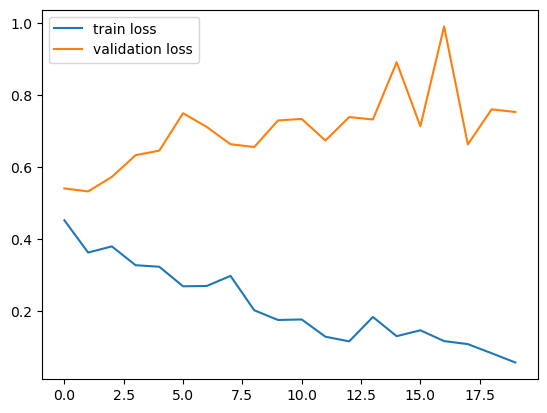

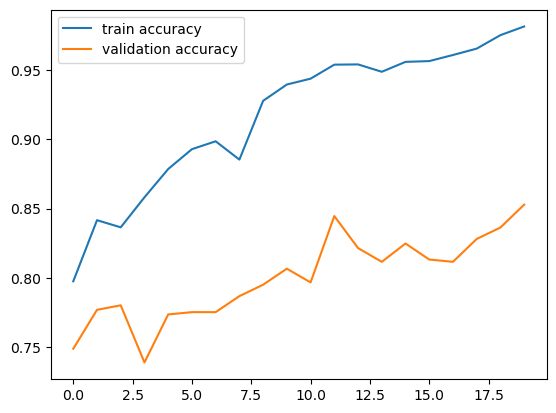

In [48]:
h = his

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

if input_pred_label == 0:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted:  data/without_mask/without_mask_10.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.98383445 0.31384566]]
0
The person in the image is not wearing a mask
